## sydäri

### tuodaan tarvittavat kirjastot

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

### datan tuominen

In [2]:
df = pd.read_csv("Stroke_v1.csv", sep=",")
# print(df[df['Smoking'] == 1].to_string()) # tupakoivat yhdessä osassa
df.head()

,ID,Weight,Smoking,Exercise,Cholesterol,Income,Exphappiness,Birthyear,Sex,Stroke
0,1,117,1,2,8.0,1080,27,1913,M,1
1,2,62,0,8,5.5,2120,55,1949,M,0
2,3,74,0,6,4.8,3170,65,1976,M,0
3,4,77,0,5,4.2,4740,61,1973,F,0
4,5,67,0,8,4.5,1900,53,1929,M,0


### onko tyhjiä arvoja? ei

In [3]:
print(df.isnull().sum())

print("\nuniikkien arvojen lukumäärät:")
print(df.nunique())

ID              0
Weight          0
Smoking         0
Exercise        0
Cholesterol     0
Income          0
Exphappiness    0
Birthyear       0
Sex             0
Stroke          0
dtype: int64

uniikkien arvojen lukumäärät:
ID              1000
Weight            81
Smoking            2
Exercise          11
Cholesterol       77
Income           406
Exphappiness      91
Birthyear        111
Sex                2
Stroke             2
dtype: int64


In [4]:
df['Sex'].replace(['M', 'F'], [1,2], inplace=True) # muutetaan sukupuoli, 1= mies
df.drop(columns=['ID'], inplace=True)
df.head(10)

# df['Sex'] = df['Sex'].replace(['M', 'F'], [1,2], inplace=True)

U:\Users\jk026110\AppData\Local\Temp\ipykernel_2960\930735412.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace(['M', 'F'], [1,2], inplace=True) # muutetaan sukupuoli, 1= mies
U:\Users\jk026110\AppData\Local\Temp\ipykernel_2960\930735412.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting',

,Weight,Smoking,Exercise,Cholesterol,Income,Exphappiness,Birthyear,Sex,Stroke
0,117,1,2,8.0,1080,27,1913,1,1
1,62,0,8,5.5,2120,55,1949,1,0
2,74,0,6,4.8,3170,65,1976,1,0
3,77,0,5,4.2,4740,61,1973,2,0
4,67,0,8,4.5,1900,53,1929,1,0
5,76,0,6,6.2,3410,72,1959,2,0
6,63,0,7,4.1,3640,71,1979,2,0
7,75,0,5,5.2,2500,99,1960,2,0
8,70,0,6,4.9,2110,48,1922,2,0
9,82,0,5,5.8,2560,34,2007,2,1


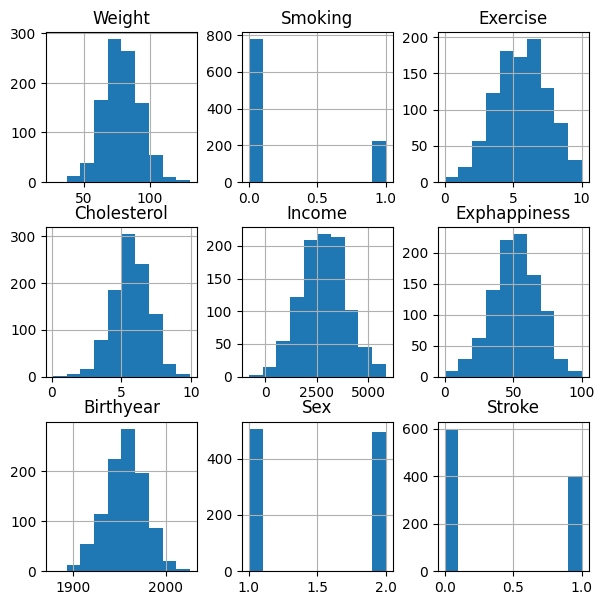

In [5]:
df.hist(figsize=(7,7))
plt.show()

In [6]:
df.describe()

,Weight,Smoking,Exercise,Cholesterol,Income,Exphappiness,Birthyear,Sex,Stroke
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,78.752000,0.223000,5.119000,5.658400,2827.990000,51.024000,1955.716000,1.494000,0.400000
std,13.939038,0.416467,1.924199,1.312262,1105.714549,16.805888,21.149341,0.500214,0.490143
min,27.000000,0.000000,0.000000,0.100000,-790.000000,0.000000,1878.000000,1.000000,0.000000
25%,70.000000,0.000000,4.000000,4.800000,2087.500000,40.000000,1942.000000,1.000000,0.000000
50%,78.000000,0.000000,5.000000,5.600000,2830.000000,51.000000,1957.000000,1.000000,0.000000
75%,88.000000,0.000000,6.000000,6.500000,3562.500000,62.000000,1971.000000,2.000000,1.000000
max,130.000000,1.000000,10.000000,9.900000,5860.000000,100.000000,2026.000000,2.000000,1.000000


In [7]:
df = df[df['Income'] > 0]
df = df[df['Birthyear'] < 2023]
df.describe()

,Weight,Smoking,Exercise,Cholesterol,Income,Exphappiness,Birthyear,Sex,Stroke
count,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,78.703927,0.221551,5.127895,5.652266,2843.575025,51.126888,1955.762336,1.495468,0.398792
std,13.953225,0.415500,1.925727,1.310310,1087.107553,16.795137,20.796584,0.500231,0.489896
min,27.000000,0.000000,0.000000,0.100000,50.000000,0.000000,1878.000000,1.000000,0.000000
25%,70.000000,0.000000,4.000000,4.800000,2100.000000,40.000000,1942.000000,1.000000,0.000000
50%,78.000000,0.000000,5.000000,5.600000,2840.000000,51.000000,1957.000000,1.000000,0.000000
75%,87.000000,0.000000,6.000000,6.500000,3570.000000,62.000000,1971.000000,2.000000,1.000000
max,130.000000,1.000000,10.000000,9.900000,5860.000000,100.000000,2013.000000,2.000000,1.000000


### datan valmistelu

In [8]:
X = df.iloc[:,:8]
Y = df.iloc[:,8] # vastemuuttuja

In [9]:
reg = LogisticRegression(max_iter= 10000)
reg.fit(X, Y)

print("kulmakertoimet:")
for feature, coef in zip(X.columns, reg.coef_[0]):
    print(f"{feature}:  {coef.round(4)}")

print(f"\nvakiokerroin: {reg.intercept_.round(4)}")


kulmakertoimet:
Weight:  0.0751
Smoking:  0.3284
Exercise:  -0.2609
Cholesterol:  0.2296
Income:  -0.0001
Exphappiness:  0.0002
Birthyear:  0.0067
Sex:  -0.1029

vakiokerroin: [-19.3891]


In [10]:
y_pred = reg.predict(X)
cm = confusion_matrix(Y, y_pred)
print(cm)

[[510  87]
 [146 250]]


In [11]:
#luokitteluraportti
accuracy_score(Y, y_pred)

0.7653575025176234

In [12]:
print(classification_report(Y, y_pred, target_names=('ei', 'kyllä')))

              precision    recall  f1-score   support

          ei       0.78      0.85      0.81       597
       kyllä       0.74      0.63      0.68       396

    accuracy                           0.77       993
   macro avg       0.76      0.74      0.75       993
weighted avg       0.76      0.77      0.76       993



In [13]:
cof = pd.DataFrame(reg.coef_*100, columns=X.columns).T # .T = transponoi
cof[0].sort_values(ascending=False)

Smoking         32.842907
Cholesterol     22.957271
Weight           7.513444
Birthyear        0.672460
Exphappiness     0.020366
Income          -0.005503
Sex            -10.288167
Exercise       -26.085881
Name: 0, dtype: float64

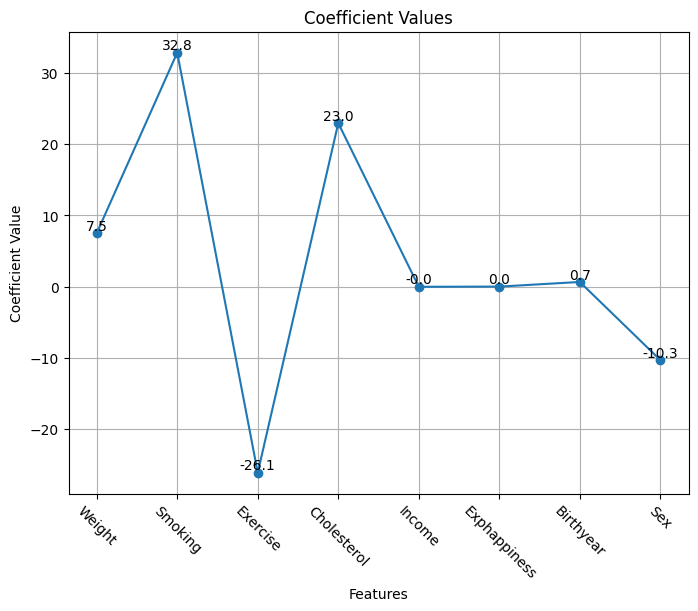

In [22]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(cof, marker ='o')
plt.title('Coefficient Values')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
for i, v in enumerate(cof[0]):
    plt.text(i, v, f"{v:.1f}", ha='center', va='bottom')
plt.xticks(rotation = -45)
plt.grid(True)
plt.show()

In [24]:
reg.predict_proba(X) # näkee miten voi ennustaa, 2,29% todnäköisyydellä 0 ja 97,70% 1

array([[0.02292572, 0.97707428],
       [0.93444391, 0.06555609],
       [0.78050198, 0.21949802],
       ...,
       [0.266664  , 0.733336  ],
       [0.12615427, 0.87384573],
       [0.62332119, 0.37667881]])